### 3.2 线性回归从零开始实现

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import random
torch.manual_seed(666)
np.random.seed(666)
torch.__version__

'1.3.1'

### 3.2.1 生成数据集

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
# torch.randn(*size) 生成标准正太分布的随机数 
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
# y = x0 * w0 + x1 * w1 + b
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
# 加入noise
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)
print(features[0], labels[0])

tensor([-0.7747,  0.7926]) tensor(-0.0361)


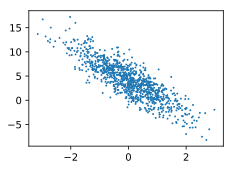

In [3]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图尺寸
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
# 画出featrues第二个特征和lables的关系图
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)
plt.show()

### 3.2.2 读取数据集

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    np.random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i+batch_size, num_examples)]) # 最后一次可能不满足一个batch
        yield features.index_select(0, j), labels.index_select(0, j)

In [5]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.3915, -0.8194],
        [-0.9924, -1.0478],
        [-1.7801,  0.7064],
        [-0.3389,  2.8011],
        [ 0.7011, -0.3622],
        [ 1.0710, -0.7355],
        [ 0.0653, -0.2193],
        [-0.1467,  1.9634],
        [ 1.1965, -0.2479],
        [-0.8459,  0.5267]]) tensor([ 6.1934,  5.7954, -1.7687, -6.0054,  6.8406,  8.8427,  5.0575, -2.7612,
         7.4190,  0.7128])


### 3.2.3 初始化模型参数

In [10]:
# 注意设置反向梯度
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32, requires_grad=True)
b = torch.zeros(1, dtype=torch.float32, requires_grad=True)

### 3.2.4 定义模型

In [12]:
def linreg(X, w, b):
    # torch.mm 两个矩阵点积
    return torch.mm(X, w) + b

### 3.2.5 定义损失函数

In [13]:
def squared_loss(y_hat, y):
    return (y_hat -y.view(y_hat.size())) ** 2 / 2

### 3.2.6 定义优化算法

In [14]:
def sgd(params, lr, batch_size):
    for param in params:
        # param.data的修改不会影响梯度
        param.data -= lr * param.grad / batch_size

### 3.2.7 训练模型

In [15]:
# 学习率
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs): # 训练模型一共需要num_epochs个迭代周期
    # 在每个迭代周期中,会使用训练数据集中的所有样本一次(假设样本数能够被批量大小整除)
    # X和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum() # l是有关小批量X和y的损失
        l.backward() # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size) # 使用小批量随机帝都下降迭代模型参数
        
        # 同时梯度清零,因为梯度会累加,所以每次进行反向传播将之前计算的梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch+1, train_l.mean().item()))

epoch 1, loss 0.050790
epoch 2, loss 0.000214
epoch 3, loss 0.000051


In [18]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9998],
        [-3.4001]], requires_grad=True)
4.2 
 tensor([4.1989], requires_grad=True)
